In [81]:
#Imports and API Key

import pandas as pd
import quandl
from scipy import stats
import scipy
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

quandl.ApiConfig.api_key = 'm8FYMyoCaJSbTrBASNHh'

In [2]:
data = pd.read_csv('data_for_pull.csv') #staging the QUANDL keys to pull in CSV

In [3]:
#quandl.get('SGE/USACNCN')

In [4]:
#data['Quandl Key'].astype('str')

In [5]:
cols = list(data['Var_name'].astype('str'))

In [6]:
#cols

In [7]:
dataset = quandl.get([val for val in data['Quandl Key']]) #looping through the QUANDL keys to pull it into one DF

In [8]:
#dataset.iloc[600:]

In [9]:
dataset.columns = cols

In [10]:
#dataset

In [11]:
#pulling in FED yield curve data

yields = pd.read_csv('Fed10Y_3M.csv')

In [12]:
#yields.head()

In [13]:
#type(yields['Date'])

In [14]:
yields['Date'] = pd.to_datetime(yields['Date'])

In [15]:
yields['Date'] = yields['Date'].apply(lambda x: x.strftime('%Y-%m'))

In [16]:
#yields.head()

In [17]:
yields = yields.set_index('Date')

In [18]:
yields = yields.drop(['3 Month Treasury Yield', 'Rec_prob', 'NBER_Rec','Unnamed: 7'], axis=1) 

In [19]:
#yields

In [20]:
## back to working on the general data

#type(dataset.index)

In [21]:
dataset.index = dataset.index.strftime('%Y-%m') #converting the datetime index to Y/M so it is collapsable

In [22]:
dataset = dataset.groupby(dataset.index, as_index=True).agg(sum) #collapsing by Y/M

In [23]:
dataset #drop off a couple years to deal with NANs, beyond that add an is missing column, put in avg value for is missing

,PMI,UNR,YUNR,GDP,CONS_SENT,HOME_SALES,PART_TIME,CPPR_PRICE,HOUS_PERMS,HOUS_STARTS,...,PERS_SAVINGS,EXPORTS,IMPORTS,TRADE_BALANCE,INT_RATE,US_M2,US_NHOME_SALES,PPI,CPI,3YRT
1913-01,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,12.1,0.0,0.00
1913-02,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,12.0,0.0,0.00
1913-03,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,12.0,0.0,0.00
1913-04,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,12.0,0.0,0.00
1913-05,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,11.9,0.0,0.00
1913-06,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,11.9,0.0,0.00
1913-07,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,12.0,0.0,0.00
1913-08,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,12.0,0.0,0.00
1913-09,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,12.2,0.0,0.00
1913-10,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,12.2,0.0,0.00


In [24]:
#converting GDP quarterly data into monthly


i = 0

for val in dataset['GDP']:
    if val == 0:
        dataset['GDP'].iloc[i] = dataset['GDP'].iloc[i-1]
        #print(i)
    
    i += 1

In [25]:
#converting Cons Sent into monthly

i = 0

for val in dataset['CONS_SENT']:
    if val == 0:
        dataset['CONS_SENT'].iloc[i] = dataset['CONS_SENT'].iloc[i-1]
        #print(i)
    
    i += 1

In [26]:
#calculating change in GDP and converting Y into categorical values 
dataset['Recession'] = ((dataset['GDP'] - dataset['GDP'].shift(3)) < 0).astype(int)

In [27]:
dataset

,PMI,UNR,YUNR,GDP,CONS_SENT,HOME_SALES,PART_TIME,CPPR_PRICE,HOUS_PERMS,HOUS_STARTS,...,EXPORTS,IMPORTS,TRADE_BALANCE,INT_RATE,US_M2,US_NHOME_SALES,PPI,CPI,3YRT,Recession
1913-01,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,12.1,0.0,0.00,0
1913-02,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,12.0,0.0,0.00,0
1913-03,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,12.0,0.0,0.00,0
1913-04,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,12.0,0.0,0.00,0
1913-05,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,11.9,0.0,0.00,0
1913-06,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,11.9,0.0,0.00,0
1913-07,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,12.0,0.0,0.00,0
1913-08,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,12.0,0.0,0.00,0
1913-09,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,12.2,0.0,0.00,0
1913-10,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,12.2,0.0,0.00,0


In [28]:
#merge fed interest rate data here
dataset = dataset.join(yields, how='outer')

In [29]:
#somehow consumer sentiment drops out here
dataset

,PMI,UNR,YUNR,GDP,CONS_SENT,HOME_SALES,PART_TIME,CPPR_PRICE,HOUS_PERMS,HOUS_STARTS,...,INT_RATE,US_M2,US_NHOME_SALES,PPI,CPI,3YRT,Recession,10 Year Treasury Yield,3 Month Treasury Yield (Bond Equivalent Basis),Spread
1913-01,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,12.1,0.0,0.00,0.0,NaN,NaN,NaN
1913-02,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,12.0,0.0,0.00,0.0,NaN,NaN,NaN
1913-03,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,12.0,0.0,0.00,0.0,NaN,NaN,NaN
1913-04,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,12.0,0.0,0.00,0.0,NaN,NaN,NaN
1913-05,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,11.9,0.0,0.00,0.0,NaN,NaN,NaN
1913-06,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,11.9,0.0,0.00,0.0,NaN,NaN,NaN
1913-07,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,12.0,0.0,0.00,0.0,NaN,NaN,NaN
1913-08,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,12.0,0.0,0.00,0.0,NaN,NaN,NaN
1913-09,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,12.2,0.0,0.00,0.0,NaN,NaN,NaN
1913-10,0.0,0.0,0.0,0.000,98.4,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,12.2,0.0,0.00,0.0,NaN,NaN,NaN


In [30]:
#NANs before cuts
dataset.isna().sum()

PMI                                                11
UNR                                                11
YUNR                                               11
GDP                                                11
CONS_SENT                                          11
HOME_SALES                                         11
PART_TIME                                          11
CPPR_PRICE                                         11
HOUS_PERMS                                         11
HOUS_STARTS                                        11
CAP_UTIL                                           11
PERS_SAVINGS                                       11
EXPORTS                                            11
IMPORTS                                            11
TRADE_BALANCE                                      11
INT_RATE                                           11
US_M2                                              11
US_NHOME_SALES                                     11
PPI                         

In [31]:
#counting number of 0s
(dataset==0).astype(int).sum(axis=0)

PMI                                                420
UNR                                                421
YUNR                                               505
GDP                                                408
CONS_SENT                                            0
HOME_SALES                                         661
PART_TIME                                          509
CPPR_PRICE                                         649
HOUS_PERMS                                         565
HOUS_STARTS                                        553
CAP_UTIL                                           649
PERS_SAVINGS                                       555
EXPORTS                                            446
IMPORTS                                            446
TRADE_BALANCE                                      446
INT_RATE                                           499
US_M2                                              553
US_NHOME_SALES                                     601
PPI       

In [32]:
#cutoff most of missing data, Post March 2019, Prior 1959

In [33]:
dataset = dataset.iloc[552:]

In [34]:
dataset = dataset.iloc[:-12]

In [35]:
dataset.shape

(722, 25)

In [36]:
(dataset==0).astype(int).sum(axis=0) #

PMI                                                 0
UNR                                                 0
YUNR                                                0
GDP                                                 0
CONS_SENT                                           0
HOME_SALES                                        108
PART_TIME                                           0
CPPR_PRICE                                         96
HOUS_PERMS                                         12
HOUS_STARTS                                         0
CAP_UTIL                                           96
PERS_SAVINGS                                        2
EXPORTS                                             1
IMPORTS                                             1
TRADE_BALANCE                                       1
INT_RATE                                            0
US_M2                                               0
US_NHOME_SALES                                     48
PPI                         

In [37]:
#dataset['HOME_SALES_PXY'] = (dataset['HOME_SALES'] == 0).astype(int)

In [38]:
#dataset['HOME_SALES'].mean()

In [39]:
#dataset['HOME_SALES'] = dataset['HOME_SALES'].mask(dataset['HOME_SALES'] == 0,dataset['HOME_SALES'].mean())

In [40]:
def clean_zeros(col_name,df_name):
    if df_name[str(col_name)][df_name[str(col_name)]==0].count():
        df_name[str(col_name)+'_PXY'] = (df_name[col_name] == 0).astype(int)
        df_name[col_name] = df_name[col_name].mask(df_name[col_name] == 0,df_name[col_name].mean())

In [41]:
y = dataset['Recession'] #splitting off Y

In [42]:
dataset = dataset.drop(columns = ['GDP','Recession','INT_RATE']) #dropping calc column and recession column from dataset, experimenting with taking out fed funds rate

In [43]:
for col in dataset.columns:
    clean_zeros(col, dataset)

In [44]:
dataset

,PMI,UNR,YUNR,CONS_SENT,HOME_SALES,PART_TIME,CPPR_PRICE,HOUS_PERMS,HOUS_STARTS,CAP_UTIL,...,CPPR_PRICE_PXY,HOUS_PERMS_PXY,CAP_UTIL_PXY,PERS_SAVINGS_PXY,EXPORTS_PXY,IMPORTS_PXY,TRADE_BALANCE_PXY,US_NHOME_SALES_PXY,CPI_PXY,3YRT_PXY
1959-01,64.4,6.0,11.6,90.8,3360.955679,1022.0,165.608033,1333.01662,1657.0,69.589715,...,1,1,1,0,0,0,0,1,0,1
1959-02,66.9,5.9,11.1,90.8,3360.955679,973.0,165.608033,1333.01662,1667.0,69.589715,...,1,1,1,0,0,0,0,1,0,1
1959-03,67.1,5.6,11.1,90.8,3360.955679,1102.0,165.608033,1333.01662,1620.0,69.589715,...,1,1,1,0,0,0,0,1,0,1
1959-04,66.9,5.2,10.8,90.8,3360.955679,1086.0,165.608033,1333.01662,1590.0,69.589715,...,1,1,1,0,0,0,0,1,0,1
1959-05,68.2,5.1,10.0,95.3,3360.955679,968.0,165.608033,1333.01662,1498.0,69.589715,...,1,1,1,0,0,0,0,1,0,1
1959-06,64.4,5.0,10.5,95.3,3360.955679,1006.0,165.608033,1333.01662,1503.0,69.589715,...,1,1,1,0,0,0,0,1,0,1
1959-07,61.5,5.1,10.5,95.3,3360.955679,1071.0,165.608033,1333.01662,1547.0,69.589715,...,1,1,1,0,0,0,0,1,0,1
1959-08,55.1,5.2,11.2,95.3,3360.955679,983.0,165.608033,1333.01662,1430.0,69.589715,...,1,1,1,0,0,0,0,1,0,1
1959-09,48.3,5.5,11.3,95.3,3360.955679,887.0,165.608033,1333.01662,1540.0,69.589715,...,1,1,1,0,0,0,0,1,0,1
1959-10,49.7,5.7,11.5,95.3,3360.955679,1075.0,165.608033,1333.01662,1355.0,69.589715,...,1,1,1,0,0,0,0,1,0,1


In [45]:
(dataset==1).astype(int).sum(axis=0)

PMI                                                 0
UNR                                                 0
YUNR                                                0
CONS_SENT                                           0
HOME_SALES                                          0
PART_TIME                                           0
CPPR_PRICE                                          0
HOUS_PERMS                                          0
HOUS_STARTS                                         0
CAP_UTIL                                            0
PERS_SAVINGS                                        0
EXPORTS                                             0
IMPORTS                                             0
TRADE_BALANCE                                       0
US_M2                                               0
US_NHOME_SALES                                      0
PPI                                                 0
CPI                                                 0
3YRT                        

In [46]:
X = dataset

In [47]:
X.shape

(722, 33)

In [48]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 45) #splitting model off. change this to be up 2000, post 2000 split
#can use sklearn time series split but that is intended for KFolds, just do splits on first 600
X_train = X.iloc[0:550]
X_test = X.iloc[550:]
y_train = y.iloc[0:550]
y_test = y.iloc[550:]

In [82]:
model = RandomForestClassifier(n_estimators=100, max_depth=2,
...                              random_state=0)
model.fit(X_train, y_train) #fitting model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [83]:
probs = model.predict_proba(X_test)

In [84]:
log_loss(y_test, probs) #removing random state really impacts log loss
#jumps from .12 to 18 after split

0.21575508624266027

In [85]:
def calculate_threshold_values(prob, y):
    '''
    Build dataframe of the various confusion-matrix ratios by threshold
    from a list of predicted probabilities and actual y values
    '''
    df = pd.DataFrame({'prob': prob, 'y': y})
    df.sort_values('prob', inplace=True)
    
    actual_p = df.y.sum()
    actual_n = df.shape[0] - df.y.sum()

    df['tn'] = (df.y == 0).cumsum()
    df['fn'] = df.y.cumsum()
    df['fp'] = actual_n - df.tn
    df['tp'] = actual_p - df.fn

    df['fpr'] = df.fp/(df.fp + df.tn)
    df['tpr'] = df.tp/(df.tp + df.fn)
    df['precision'] = df.tp/(df.tp + df.fp)
    df = df.reset_index(drop=True)
    return df
    
def plot_roc(ax, df):
    ax.plot([1]+list(df.fpr), [1]+list(df.tpr), label="ROC")
    ax.plot([0,1],[0,1], 'k', label="random")
    ax.set_xlabel('fpr')
    ax.set_ylabel('tpr')
    ax.set_title('ROC Curve')
    ax.legend()
    
def plot_precision_recall(ax, df):
    ax.plot(df.tpr,df.precision, label='precision/recall')
    #ax.plot([0,1],[0,1], 'k')
    ax.set_xlabel('recall')
    ax.set_ylabel('precision')
    ax.set_title('Precision/Recall Curve')
    ax.plot([0,1],[df.precision[0],df.precision[0]], 'k', label='random')
    ax.set_xlim(xmin=0,xmax=1)
    ax.set_ylim(ymin=0,ymax=1)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


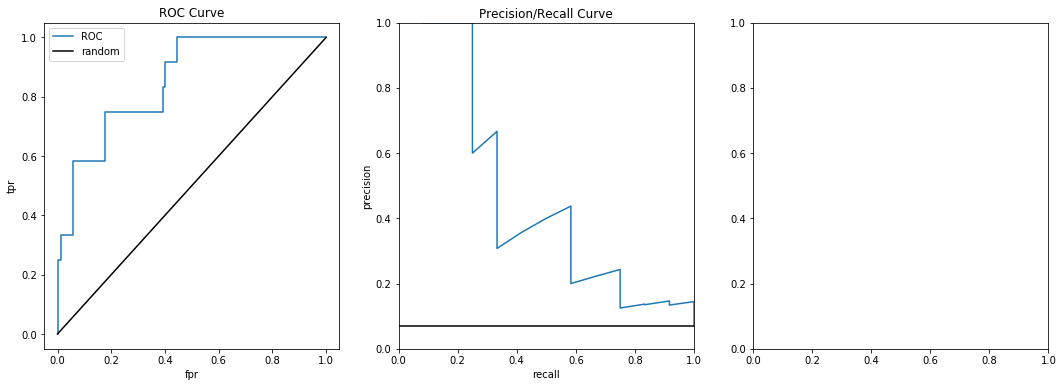

In [86]:
fig, (ax0, ax1, ax3) = plt.subplots(1,3, figsize=(18,6))
df = calculate_threshold_values(model.predict_proba(X_test)[:,1], y_test)
plot_roc(ax0, df)
plot_precision_recall(ax1, df)

In [87]:
y_test, probs

(2004-11   0.000
 2004-12   0.000
 2005-01   0.000
 2005-02   0.000
 2005-03   0.000
 2005-04   0.000
 2005-05   0.000
 2005-06   0.000
 2005-07   0.000
 2005-08   0.000
 2005-09   0.000
 2005-10   0.000
 2005-11   0.000
 2005-12   0.000
 2006-01   0.000
 2006-02   0.000
 2006-03   0.000
 2006-04   0.000
 2006-05   0.000
 2006-06   0.000
 2006-07   0.000
 2006-08   0.000
 2006-09   0.000
 2006-10   0.000
 2006-11   0.000
 2006-12   0.000
 2007-01   0.000
 2007-02   0.000
 2007-03   0.000
 2007-04   0.000
            ... 
 2016-09   0.000
 2016-10   0.000
 2016-11   0.000
 2016-12   0.000
 2017-01   0.000
 2017-02   0.000
 2017-03   0.000
 2017-04   0.000
 2017-05   0.000
 2017-06   0.000
 2017-07   0.000
 2017-08   0.000
 2017-09   0.000
 2017-10   0.000
 2017-11   0.000
 2017-12   0.000
 2018-01   0.000
 2018-02   0.000
 2018-03   0.000
 2018-04   0.000
 2018-05   0.000
 2018-06   0.000
 2018-07   0.000
 2018-08   0.000
 2018-09   0.000
 2018-10   0.000
 2018-11   0.000
 2018-12   0.0

In [88]:
results = pd.DataFrame(probs)

In [89]:
y_test[1]

0.0

In [90]:
results['actual'] = y_test.values

In [91]:
results.index = y_test.index

In [92]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [93]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(results)

            0     1  actual
2004-11 0.965 0.035   0.000
2004-12 0.965 0.035   0.000
2005-01 0.965 0.035   0.000
2005-02 0.965 0.035   0.000
2005-03 0.965 0.035   0.000
2005-04 0.965 0.035   0.000
2005-05 0.965 0.035   0.000
2005-06 0.965 0.035   0.000
2005-07 0.961 0.039   0.000
2005-08 0.966 0.034   0.000
2005-09 0.962 0.038   0.000
2005-10 0.966 0.034   0.000
2005-11 0.966 0.034   0.000
2005-12 0.966 0.034   0.000
2006-01 0.966 0.034   0.000
2006-02 0.966 0.034   0.000
2006-03 0.966 0.034   0.000
2006-04 0.966 0.034   0.000
2006-05 0.966 0.034   0.000
2006-06 0.967 0.033   0.000
2006-07 0.966 0.034   0.000
2006-08 0.967 0.033   0.000
2006-09 0.966 0.034   0.000
2006-10 0.966 0.034   0.000
2006-11 0.966 0.034   0.000
2006-12 0.966 0.034   0.000
2007-01 0.966 0.034   0.000
2007-02 0.966 0.034   0.000
2007-03 0.966 0.034   0.000
2007-04 0.966 0.034   0.000
2007-05 0.966 0.034   0.000
2007-06 0.966 0.034   0.000
2007-07 0.966 0.034   0.000
2007-08 0.966 0.034   0.000
2007-09 0.963 0.037 

In [94]:
print(results)

            0     1  actual
2004-11 0.965 0.035   0.000
2004-12 0.965 0.035   0.000
2005-01 0.965 0.035   0.000
2005-02 0.965 0.035   0.000
2005-03 0.965 0.035   0.000
2005-04 0.965 0.035   0.000
2005-05 0.965 0.035   0.000
2005-06 0.965 0.035   0.000
2005-07 0.961 0.039   0.000
2005-08 0.966 0.034   0.000
2005-09 0.962 0.038   0.000
2005-10 0.966 0.034   0.000
2005-11 0.966 0.034   0.000
2005-12 0.966 0.034   0.000
2006-01 0.966 0.034   0.000
2006-02 0.966 0.034   0.000
2006-03 0.966 0.034   0.000
2006-04 0.966 0.034   0.000
2006-05 0.966 0.034   0.000
2006-06 0.967 0.033   0.000
2006-07 0.966 0.034   0.000
2006-08 0.967 0.033   0.000
2006-09 0.966 0.034   0.000
2006-10 0.966 0.034   0.000
2006-11 0.966 0.034   0.000
2006-12 0.966 0.034   0.000
2007-01 0.966 0.034   0.000
2007-02 0.966 0.034   0.000
2007-03 0.966 0.034   0.000
2007-04 0.966 0.034   0.000
...       ...   ...     ...
2016-09 0.971 0.029   0.000
2016-10 0.977 0.023   0.000
2016-11 0.971 0.029   0.000
2016-12 0.976 0.024 

In [95]:
recent_X = X.iloc[-250:]
recent_y = y.iloc[-250:]

In [96]:
probs_recent = model.predict_proba(recent_X)

In [97]:
results = pd.DataFrame(probs_recent)
results['actual'] = recent_y.values
results.index = recent_y.index

In [98]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(results)

            0     1  actual
1998-05 0.994 0.006   0.000
1998-06 0.994 0.006   0.000
1998-07 0.994 0.006   0.000
1998-08 0.994 0.006   0.000
1998-09 0.993 0.007   0.000
1998-10 0.993 0.007   0.000
1998-11 0.993 0.007   0.000
1998-12 0.993 0.007   0.000
1999-01 0.993 0.007   0.000
1999-02 0.993 0.007   0.000
1999-03 0.993 0.007   0.000
1999-04 0.993 0.007   0.000
1999-05 0.994 0.006   0.000
1999-06 0.990 0.010   0.000
1999-07 0.994 0.006   0.000
1999-08 0.994 0.006   0.000
1999-09 0.988 0.012   0.000
1999-10 0.988 0.012   0.000
1999-11 0.994 0.006   0.000
1999-12 0.994 0.006   0.000
2000-01 0.989 0.011   0.000
2000-02 0.992 0.008   0.000
2000-03 0.992 0.008   0.000
2000-04 0.992 0.008   0.000
2000-05 0.992 0.008   0.000
2000-06 0.989 0.011   0.000
2000-07 0.988 0.012   0.000
2000-08 0.991 0.009   0.000
2000-09 0.984 0.016   0.000
2000-10 0.984 0.016   0.000
2000-11 0.984 0.016   0.000
2000-12 0.966 0.034   0.000
2001-01 0.960 0.040   0.000
2001-02 0.956 0.044   0.000
2001-03 0.952 0.048 

In [75]:
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
model.coef_

array([[-3.84810289e-01,  2.48979835e-02,  5.68376709e-02,
         6.28067682e-02,  4.35611906e-03,  1.37564733e-05,
         4.52191936e-02, -1.47940422e-02,  8.03486460e-03,
        -1.42669537e-01, -1.52320889e-02, -1.25516066e-03,
         1.09873143e-03,  1.01410085e-03, -6.35187751e-05,
        -3.77755039e-03,  4.83261708e-02,  8.55602334e-02,
         2.45818671e-02,  3.82092881e-03, -1.57335466e-02,
         1.95544754e-02,  1.55560426e-02,  1.56807317e-02,
        -4.72382965e-04,  1.56807317e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         3.07931817e-02,  0.00000000e+00,  3.30657557e-02]])

In [74]:
dataset.columns

Index(['PMI', 'UNR', 'YUNR', 'CONS_SENT', 'HOME_SALES', 'PART_TIME',
       'CPPR_PRICE', 'HOUS_PERMS', 'HOUS_STARTS', 'CAP_UTIL', 'PERS_SAVINGS',
       'EXPORTS', 'IMPORTS', 'TRADE_BALANCE', 'US_M2', 'US_NHOME_SALES', 'PPI',
       'CPI', '3YRT', '10 Year Treasury Yield',
       '3 Month Treasury Yield (Bond Equivalent Basis)', 'Spread',
       'HOME_SALES_PXY', 'CPPR_PRICE_PXY', 'HOUS_PERMS_PXY', 'CAP_UTIL_PXY',
       'PERS_SAVINGS_PXY', 'EXPORTS_PXY', 'IMPORTS_PXY', 'TRADE_BALANCE_PXY',
       'US_NHOME_SALES_PXY', 'CPI_PXY', '3YRT_PXY'],
      dtype='object')

In [79]:
for object in zip(dataset.columns,model.coef_[0] ):
    print(object)

('PMI', -0.38481028935451134)
('UNR', 0.024897983478717658)
('YUNR', 0.05683767090218607)
('CONS_SENT', 0.06280676823037924)
('HOME_SALES', 0.00435611905564766)
('PART_TIME', 1.3756473347924796e-05)
('CPPR_PRICE', 0.04521919361970001)
('HOUS_PERMS', -0.014794042238187843)
('HOUS_STARTS', 0.008034864598942593)
('CAP_UTIL', -0.14266953723720152)
('PERS_SAVINGS', -0.015232088878166194)
('EXPORTS', -0.0012551606634881825)
('IMPORTS', 0.0010987314301462053)
('TRADE_BALANCE', 0.0010141008457934448)
('US_M2', -6.351877512056574e-05)
('US_NHOME_SALES', -0.0037775503874305067)
('PPI', 0.048326170824154316)
('CPI', 0.08556023340246272)
('3YRT', 0.02458186710958006)
('10 Year Treasury Yield', 0.003820928810470003)
('3 Month Treasury Yield (Bond Equivalent Basis)', -0.015733546607210065)
('Spread', 0.019554475417680135)
('HOME_SALES_PXY', 0.015556042562708624)
('CPPR_PRICE_PXY', 0.015680731667704773)
('HOUS_PERMS_PXY', -0.00047238296460221107)
('CAP_UTIL_PXY', 0.015680731667704773)
('PERS_SAVINGS_